Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling

Tips for using SVM for image classification

* You should have image data in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D which i'll be showing later on in this notebook).

* SVM algorithm is to be used when their is shortage of data in our dataset .

* If we have good amount of image data so, we look further for CNN model.


# INFO OF DATASET

**Importing the dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing basic Packages..!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

now,we have provided data directory to DATADIR variable and labels of color set to CATEGORIES variable for further use.

In [3]:
DATADIR = 'C:\\Users\\AHanan\\Desktop\\ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

Ex. of an sample image is shown below


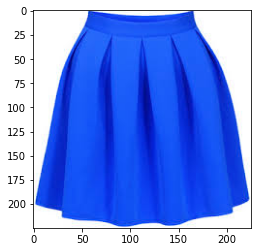

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


performing preprocessing steps...::


In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [6]:
print(len(training_data))

107


storing trainig length for further use.

In [7]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [9]:
X.shape

(107, 30000)

**flattening the array**

In [10]:
X = X/255.0

Ex. of flattened array...

In [11]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

note : y should be in array form compulsory.


In [12]:
y=np.array(y)

In [13]:
y.shape

(107,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)



**fitting our data in SVM model**

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

**predicting the X_test**

In [16]:
y2 = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6666666666666666


**Accuracy of 92.28% which is what we wanted**

**fromulating the Classification report**

In [18]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.60      0.50      0.55         6
           2       1.00      0.50      0.67         2
           3       0.75      0.75      0.75         4
           4       1.00      0.50      0.67         2
           5       0.67      0.67      0.67         3
           6       0.57      0.80      0.67         5
           7       0.50      1.00      0.67         2

    accuracy                           0.67        27
   macro avg       0.76      0.67      0.68        27
weighted avg       0.72      0.67      0.67        27



In [19]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [20]:
result


,original,predicted
0,3,3
1,3,3
2,5,5
3,6,6
4,1,1
5,1,1
6,4,4
7,7,7
8,1,5
9,1,6


we have moslty classified all the images correctly with their labels .doing classification on limited dataset is always a challenging task....but by SVM we have dealed with it succesfully

In [21]:
print(len(result['predicted']))

27
